# Model Training

1.1. Import the Data and required libraries

importing the pandas, numpy, matplotlib, sklearn, xgboost, catboost and seaborn libraries

In [1]:
# Basic impot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the data as Pandas Dataframe

In [2]:
df = pd.read_csv('data/stud.csv')

Show the first 5 rows

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'], axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:     ",end=" " )
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:     ",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:      ['none' 'completed']


In [7]:
y = df['math_score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

## Data Trasforming

In [9]:
# column transforming with 3 type of transformer
# here we transform 2 different types of data. (1). Object (2).int
cat_features = X.select_dtypes(include = "object").columns
num_features = X.select_dtypes(exclude = "object").columns

# apply the encodeing and scaling. then column transforming
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features), # for categorical
        ("StandardScaler", numeric_transformer, num_features) # for numerical
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

## Prepare the training and testing dataset 

In [12]:
#seperate the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

model evaluation function

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

training our data with list of regression models

In [14]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighboars Regressor" : KNeighborsRegressor(),
    "DicisionTree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBoost Regressor" : XGBRegressor(),
    "Catboost Regressor" : CatBoostRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor()
}
model_list = []
r2_list = []
mae_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # train the model using the X_train(dependent) and y_train(independent)

    # make prediction
    y_train_pred =  model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and test data
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance in training set")
    print("- Root Mean Square Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- r2_score: {:.4f}".format(model_train_r2))

    print("-----------------------------------")
    print("Model performance in testing set")
    print("- Root Mean Square: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- r2_score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    mae_list.append(model_test_mae)
    print('='*35)
    print('\n')
    

Linear Regression
Model performance in training set
- Root Mean Square Error: 5.3243
- Mean Absolute Error: 4.2671
- r2_score: 0.8743
-----------------------------------
Model performance in testing set
- Root Mean Square: 5.3960
- Mean Absolute Error: 4.2158
- r2_score: 0.8803


Lasso
Model performance in training set
- Root Mean Square Error: 6.5938
- Mean Absolute Error: 5.2063
- r2_score: 0.8071
-----------------------------------
Model performance in testing set
- Root Mean Square: 6.5197
- Mean Absolute Error: 5.1579
- r2_score: 0.8253


Ridge
Model performance in training set
- Root Mean Square Error: 5.3233
- Mean Absolute Error: 4.2650
- r2_score: 0.8743
-----------------------------------
Model performance in testing set
- Root Mean Square: 5.3904
- Mean Absolute Error: 4.2111
- r2_score: 0.8806


K-Neighboars Regressor
Model performance in training set
- Root Mean Square Error: 5.7077
- Mean Absolute Error: 4.5167
- r2_score: 0.8555
-----------------------------------
Model 

Results

In [15]:
pd.DataFrame(list(zip(model_list, r2_list, mae_list)), columns = ['Model','r2_score', 'MAE']).sort_values(by = ['r2_score'], ascending = False)

,Model,r2_score,MAE
2,Ridge,0.880593,4.211101
0,Linear Regression,0.880345,4.215820
7,Catboost Regressor,0.851632,4.612532
5,Random Forest Regressor,0.850716,4.650908
8,Adaboost Regressor,0.847189,4.791523
1,Lasso,0.825320,5.157882
6,XGBoost Regressor,0.821589,5.084372
3,K-Neighboars Regressor,0.783813,5.621000
4,DicisionTree,0.740916,6.265000


### Here we can choose two models 
1. Ridge Regressor
2. Linear Regressor

Ridge Regressor

In [16]:
# define ridge regressor model
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred)*100
print("Accuracy of the ridge model is %.2f", r2_score_ridge)

Accuracy of the ridge model is %.2f 88.05931485028738


In [18]:
# define linear regressor model
linear_regressor_model = LinearRegression()
linear_regressor_model.fit(X_train, y_train)
y_pred_linear = linear_regressor_model.predict(X_test)
r2_score_linear = r2_score(y_test, y_pred_linear)*100
print("Accuracy of linear regressor model is %.2f", r2_score_linear)

Accuracy of linear regressor model is %.2f 88.03449074540941


ploty y_pred and y_test of ridge regressor

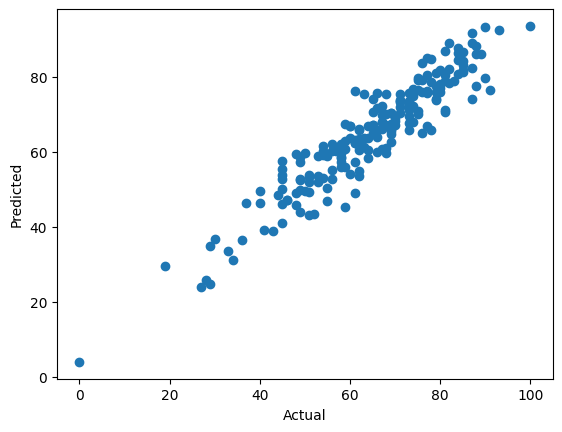

In [19]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

for linear regressor

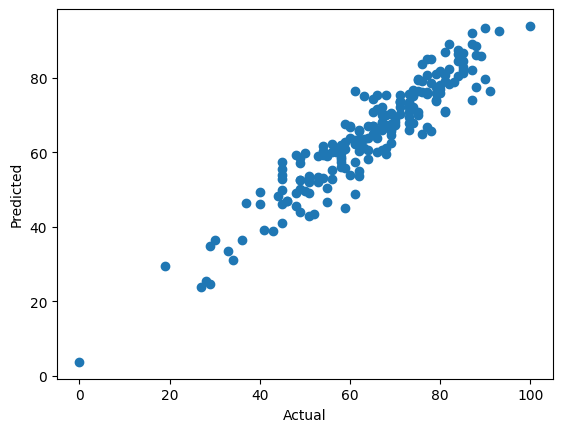

In [20]:
plt.scatter(y_test, y_pred_linear);
plt.xlabel('Actual');
plt.ylabel('Predicted');

regression line for ridge regressor

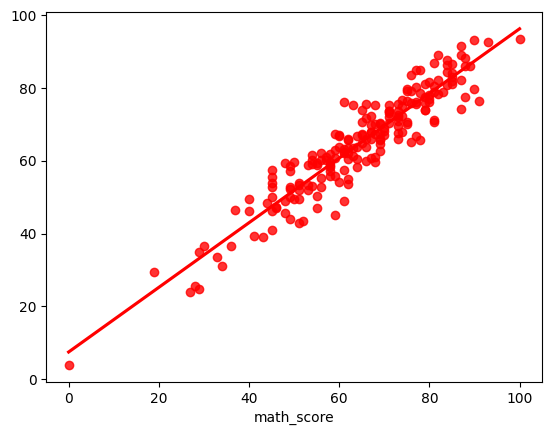

In [21]:
sns.regplot(x = y_test, y = y_pred, ci = None, color = 'red');

<Axes: xlabel='math_score'>

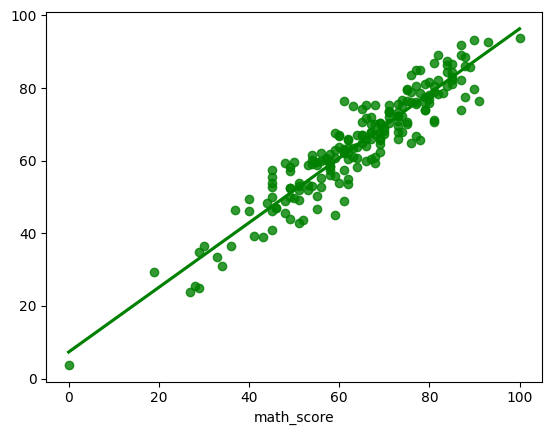

In [22]:
sns.regplot(x = y_test, y = y_pred_linear, ci = None, color = 'green')

Difference between actual and predicted value

In [23]:
ridge_pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test - y_pred})
ridge_pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504


In [24]:
linear_pred_df = pd.DataFrame({'Actual Value':y_test, 'Linear Predicted Value':y_pred_linear, 'Difference':y_test - y_pred_linear})
linear_pred_df

,Actual Value,Linear Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
